\begin{equation}
    \mathcal{L}(\mu)
    =
    Poi(n_{obs} | \lambda=\mu s_{0} + b)
\end{equation}

\begin{equation}
    t
    =
    -2 \ln \frac{\mathcal{L}(\mu)}{\mathcal{L}(\hat{\mu})}
\end{equation}

\begin{equation}
    \frac{\lambda^{n}}{n!} e^{-\lambda}
    \rightarrow
    \frac{n^{n}}{n!} e^{-n}
\end{equation}

In [67]:
import numpy as np
import scipy.stats
from scipy.stats import poisson
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def likelihood_model(mu, n, bkg, s0=1.0, neg=False, log=False):
    """Return the value of the Poisson likelihood function, given the:
       - mu: signal strength parameter,
       - n: number of events observed,
       - bkg: expected number of background events,
       - s0: nominal number of signal events
       The total expected number of events is lambda = bkg + mu*s0.
       
       The `neg` argument just multiplies the likelihood by (-1).
       This is used for the minimize() function."""
    sig = mu * s0
    N_exp = bkg + sig
    if log:
        likelihood = poisson.logpmf(n, mu=N_exp)
    else:
        likelihood = poisson.pmf(n, mu=N_exp)
    
    if neg:
        return -likelihood
    else:
        return likelihood

In [70]:
def perform_fit(N_obs, mu, bkg, s0=1.0):
    
    fit_result_free = minimize(likelihood_model, x0=[0.0], args=(N_obs, bkg, s0, True, True), method='Nelder-Mead')
    LL_free = -fit_result_free['fun'] # (-1)*(-log likelihood)
    LL_cond = likelihood_model(mu, N_obs, bkg, s0=1.0, neg=False, log=True)
    parameter_MLE_free = fit_result_free['x']
    muhat = parameter_MLE_free[0]    
    
    t =  -2.0*(LL_cond-LL_free)
    
    return (muhat, LL_free, LL_cond, t)

In [71]:
nExperiments = 1000

In [72]:
s0 = 1.0

## $H_{0}$

In [129]:
b_H0     = 100.0
mu_H0    = 0.0
N_exp_H0 = mu_H0*s0 + b_H0

In [130]:
N_events_H0 = poisson.rvs(mu=N_exp_H0, loc=0.0, size=nExperiments)

In [131]:
fit_results_H0 = np.array([perform_fit(N_obs, mu=0.0, bkg=b_H0, s0=1.0) for N_obs in N_events_H0])

## $H_{1}$

In [49]:
b_H1     = 100.0
mu_H1    = 10.0
N_exp_H1 = mu_H1*s0 + b_H1

In [50]:
N_events_H1 = poisson.rvs(mu=N_exp_H1, loc=0.0, size=nExperiments)

In [76]:
fit_results_H1 = np.array([perform_fit(N_obs, mu=0.0, bkg=b_H1, s0=1.0) for N_obs in N_events_H1])

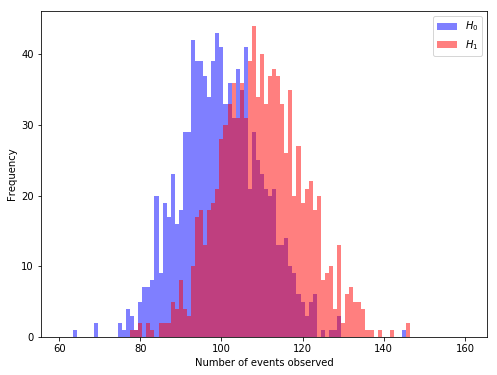

In [77]:
fig,ax = plt.subplots(figsize=(8,6))
n, bins, patches = ax.hist(N_events_H0, bins=100, range=(60.5, 160.5), color='b', alpha=0.5, label=r'$H_{0}$')
ax.hist(N_events_H1, bins=100, range=(60.5, 160.5), color='r', alpha=0.5, label=r'$H_{1}$')
#ax.set_title("Signal region")
ax.set_xlabel("Number of events observed")
ax.set_ylabel("Frequency")
ax.legend()

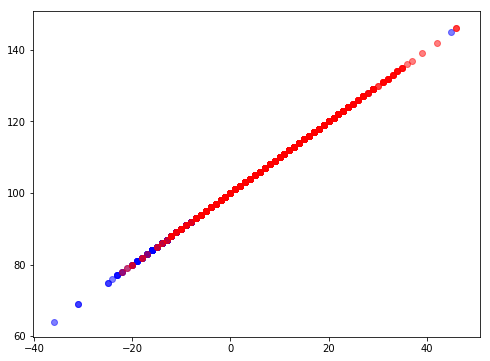

In [122]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(fit_results_H0[:,0], N_events_H0, alpha=0.5, color='b')
ax.scatter(fit_results_H1[:,0], N_events_H1, alpha=0.5, color='r')

In [137]:
N_events_H0

array([109,  88,  89, 102,  99,  84, 113,  92, 101, 106, 106,  95, 101,
        84,  95, 117,  98, 119, 103,  97, 113,  85, 119, 108,  76, 103,
        70,  86,  97, 109, 102, 100, 108, 101,  90, 108,  97, 114, 112,
       127,  96, 107, 112,  92, 104,  86, 127,  95, 118,  86,  92,  82,
        92,  99, 100,  98,  91, 107, 108, 109, 102, 103,  96, 110, 106,
        91, 116, 110, 128,  92,  87, 107,  99, 109,  82, 119,  93, 122,
       100, 106,  97, 101, 106, 111,  83, 110,  85,  93, 120,  90, 100,
       101,  89, 103, 105,  96, 122,  93,  91,  89,  94, 101, 102, 100,
        96,  97,  90,  95,  97, 101,  84,  92, 106,  99,  90,  95, 114,
       103, 105,  95, 116, 103, 100, 107,  97,  87,  83, 108,  89, 101,
       114, 112, 101,  97, 101,  86, 113, 105,  95,  99, 115, 105, 109,
        90, 100,  85, 105,  88,  91, 114,  86,  96, 112,  93,  90,  85,
        97, 100, 100, 115, 110, 113,  93,  88,  94, 115,  98, 107,  98,
       116, 103,  96, 101, 105,  88, 103, 101, 102, 107, 102,  9

In [133]:
N_events_H0.shape

(1000,)

In [127]:
d = fit_results_H0[:,0] - N_events_H0

In [128]:
d

array([-100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
       -100., -100.,

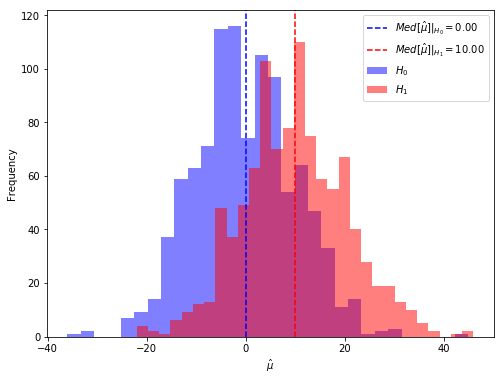

In [101]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(fit_results_H0[:,0], label=r'$H_{0}$', bins=30, alpha=0.5, color='b')
ax.hist(fit_results_H1[:,0], label=r'$H_{1}$', bins=30, alpha=0.5, color='r')
ax.set_xlabel(r"$\hat{\mu}$")
ax.set_ylabel(r"Frequency")
muhat_median_H0 = np.median(fit_results_H0[:,0])
muhat_median_H1 = np.median(fit_results_H1[:,0])
ax.axvline(x=muhat_median_H0, linestyle='--', c='b', label='$Med[\hat{{\mu}}]|_{{H_{{0}}}} = {:.2f}$'.format(muhat_median_H0))
ax.axvline(x=muhat_median_H1, linestyle='--', c='r', label='$Med[\hat{{\mu}}]|_{{H_{{1}}}} = {:.2f}$'.format(muhat_median_H1))
ax.legend()

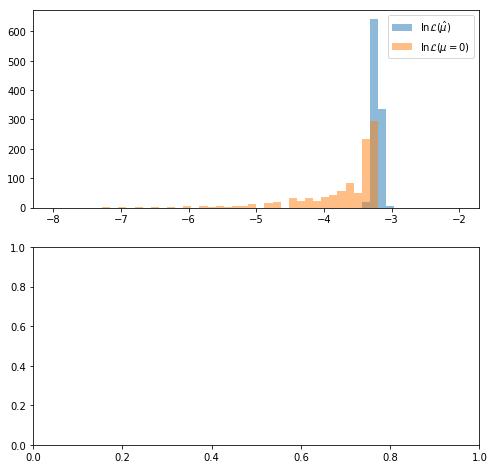

In [108]:
fig, axes = plt.subplots(figsize=(8,8), nrows=2)
ax = axes.flatten()
ax[0].hist(fit_results_H0[:,1], alpha=0.5, bins=50, range=(-8,-2), label='$\ln \mathcal{L}(\hat{\mu})$')
ax[0].hist(fit_results_H0[:,2], alpha=0.5, bins=50, range=(-8,-2), label='$\ln \mathcal{L}(\mu=0)$')
ax[0].legend()

In [115]:
to_examine = []
for experiment in fit_results_H0:
    ll_free = experiment[1]
    ll_cond = experiment[2]
    if ll_cond > ll_free:
        to_examine.append( (ll_free, ll_cond))

In [116]:
to_examine

[]

In [117]:
np.min(fit_results_H0[:,1]), np.max(fit_results_H0[:,1])

(-3.40788011614751, -2.999682147622181)

In [118]:
np.min(fit_results_H0[:,2]), np.max(fit_results_H0[:,2])

(-12.284595798857481, -3.222356956754311)